### 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください

## (1) 物体検出の分野にはどういった手法が存在したか。

### 今までのR_CNN(物体検出の手法）
R-CNN  
Region proposalをselective searchと言う手法で行なっている　。  
約2000個の出力に対してそれぞれCNNで計算。  
それぞれに対してサポートベクターで分類する。  

Fast R-CNN   
こちらもRegion proposalをselective searchと言う手法で行なっている　。   
主な改善点は、R-CNNにおいて候補領域ごとにCNNを全て回していたのを、RoI poolingを採用することで畳み込み処理部分を   
一度で済ますことができるようになり処理速度を大きく向上させています。   
R-CNN 検出器は各領域を分類しなければなりませんが、Fast R-CNN は各領域提案に対応する CNN 特徴量をプーリングします。  
Fast R-CNN 検出器ではオーバーラップする領域の計算を共有するので、Fast R-CNN は R-CNN よりも効率的です。

Faster R-CNN  
Region proposalをRPNと言う手法で行なっている　。  
Fast R-CNNなどの研究を通して物体検出に用いるネットワークの大幅な時間短縮に繋がったが、    
一方で領域提案(region proposal)部分の処理がボトルネックとなった。そのため、    
領域提案ネットワーク(RPN; Region Proposal Network)を導入し、一つのネットワークに統合した。

## (2) Fasterとあるが、どういった仕組みで高速化したのか。

### Region proposal networkと言う手法を使って高速化している。
従来のFast RCNNの最初の工程にRPNを使った候補領域を提案する工程をおいた。
RPNによって物体の大まかな位置と大きさ　を特定するようにし、それから従来のFast　RCNNの手法で検出するようにするようにしている。  
RPNはより高速に領域提案できることに
加え、RPNの段階で出力したfeature mapを後工程の物体検出の時に流用できるメリットがある。

## (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

### In OverFeat, the region-wise features come from a sliding window of one aspect ratio over a scale pyramid. These features are used to simultaneously determine the location and category of objects.

### One_stage 検出作業を１ステップでやる手法  
今回はFast R-CNNのこと。  
scale pyramidをsliding windows（アスペクト比は一種類）することからえた特徴量を用いて、オブジェクトの位置と分類を同時に行う手法

### In RPN, the features are from square (3×3) sliding windows and predict proposals relative to anchors with different scales and aspect ratios. Though both methods use sliding windows, the region proposal task is only the first stage of Faster R- CNN—the downstream Fast R-CNN detector attends to the proposals to refine them. 

### Two_stage 領域提案　物体検出の二段階でやる手法
今回はFaster R-CNNのこと。  
RPNでは違ったアスペクト比と大きさのアンカーボックスに対応したsliding windowsを使って、提案領域の特徴量をえる。  
両方ともsliding windowsを使うが領域提案タスクがあるのはFasterのみ。

### その他
Using the ZF model, the one-stage system has an mAP of 53.9%.   
This is lower than the two-stage system (58.7%) by 4.8%.  と書いてある通り、   
今回の実験ではtwo_stageの方が精度がよかった。

## (4) RPNとは何か。

### RPN has a classifier and a regressor.     
The authors have introduced the concept of anchors. Anchor is the central point of the sliding window.    
Classifier determines the probability of a proposal having the target object.    
Regression regresses the coordinates of the proposals. 
  
### These anchors are assigned label based on two factors:  
The anchors with highest Intersection-over-union overlap with a ground truth box.  
The anchors with Intersection-Over-Union Overlap higher than 0.7.

### Region Proposal Network (RPN) （領域提案するネットワーク）のこと。
sliding windowsを実施し、中にターゲットが含まれているかどうかの分類をするために、ターゲットが含まれている確率を決めます。  
IOUという指標を使っています。  
物体のアスペクト比に対応するために、アンカーボックスと呼ばれる数種類の大きさとアスペクト比をもつ箱を用意することで  
より適した　bounding boxを設定することができます。  
この際。複数あるアンカーボックスのうち、どれが一番適しているのかを回帰によって決めます。  
IOUがもっとも高いアンカーを採用します。
またこの処理によって出力されるfeature mapをのちの分類タスクて使用します　。

## (5) RoIプーリングとは何か。

### feature mapの形状を合わせるためのプーリング
以下画像のように、形状を任意のサイズ　に変える手法。  
（画像では２X2になるようにマックスプーリングしている）  
今回は  
RPNから得られた特徴量マップを後の畳こみ工程で共有するために使われている。  
ROI (reasion of interest) プーリングすることで、畳こみするために必要なサイズに整形して使うことができる。

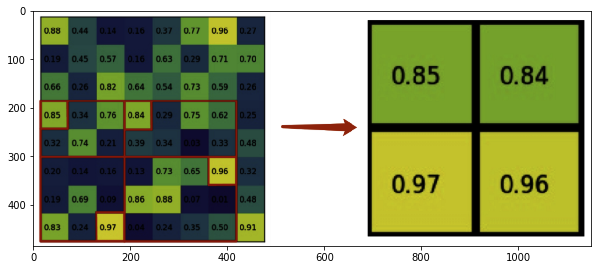

In [5]:
import matplotlib.pyplot as plt
img = plt.imread('roi_pooling.png')
plt.figure(figsize = (10, 20))
plt.imshow(img)

## (6) Anchorのサイズはどうするのが適切か。

### 一般的に、アンカー ボックスのサイズは、学習データセットに含まれるオブジェクトのスケールと縦横比に関する予備知識に基づいて決定されます。   
アンカー ボックスの形状、スケール、および数は、検出器の効率性と正確性に影響します。    
アンカー ボックスの推定の一例として、学習データを用いて実験的に出している例があります。

1. 複数のアンカー　と学習データ用意
2. 可視化とIOUでのクラスタリング
3. クラスタごとの平均IOUを参考に決める。

以下参考（math works）  
グラウンド トゥルース ボックス分布の可視化  
ラベル付きボックスを可視化し、データセットに存在するオブジェクト サイズの範囲を理解しやすくします  
ボックスの縦横比に対してボックス領域をプロットします。  
プロットには、サイズと形状が類似したオブジェクトのグループがいくつか示されますが、グループは分散しているため、  
手動でアンカー ボックスを選択するのは困難です。アンカー ボックスを推定する優れた方法は、  
意味のある計量を使用して類似するボックスをグループ化できるクラスタリング アルゴリズムを使用することです。  
  
アンカー ボックスの推定  
学習データからアンカー ボックスを推定します。ntersection over Union (IoU) 距離計量を使用します。  
ボックス サイズの増加に伴い誤差が増大するユークリッド距離計量とは異なり、IoU に基づいた距離計量はボックスのサイズに対して不変です   
また、IoU 距離計量を使用すると、縦横比とサイズが類似するボックスがまとめてクラスタリングされるため、  
アンカー ボックスの推定がデータに適合します。

### reference
https://jp.mathworks.com/help/vision/ug/anchor-boxes-for-object-detection.html  
https://jp.mathworks.com/help/vision/ug/estimate-anchor-boxes-from-training-data.html

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

#### mAPという評価指標を使用している。
Mean Average Precision  
「Mean Average Precision」、通称MAPと呼ばれる指標です。  
「Mean」も「Average」も和訳すると「平均」になってしまうので適切な和訳が難しいからか、  
日本でも一般的に「MAP」と呼ばれます。     
これは、単に試験データ全てにおける「平均再現率」を平均したものです。    
テストデータを2つ用意して、1つ目における平均再現率(AP)が0.7、2つ目における平均再現率が0.5ならば、MAPは0.6になります。    
一般的にテストデータが1つである事は無いので、システムの性能指標としてはこちらのMAPを使うことになる場合が多いかと思います。

#### 使用データ
PASCAL VOC  
MS COCO